In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
goal_dist = 2.0
hypotenuse = 6.4 * 2**0.5
max_improv_per_step = 0.01  # 1 m/s for 0.01s
realistic_coef = 0.5
realistic_improv = max_improv_per_step * realistic_coef

In [4]:
realistic_iters = goal_dist / (max_improv_per_step * realistic_coef)
realistic_iters = int(realistic_iters)
realistic_iters

400

## Difference of (scaled) normalized euclidean potentials


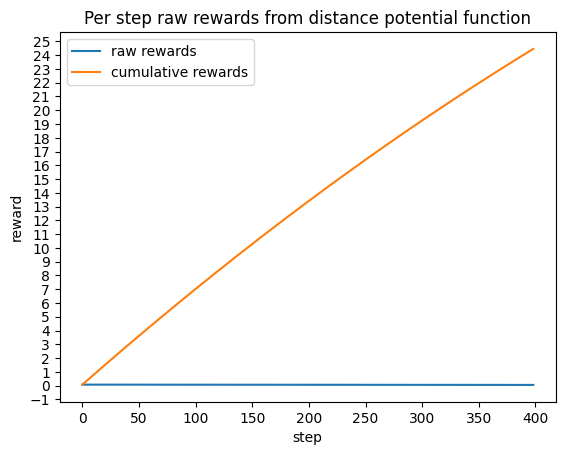

In [18]:
gamma = 0.999
coef = 100.0
step_penalty = -0.005
rewards_potential = np.zeros(realistic_iters-1)
for i in range(1, realistic_iters):
    dist_prev = (goal_dist - (i - 1) * realistic_improv) / hypotenuse
    dist_curr = (goal_dist - i * realistic_improv) / hypotenuse
    delta_phi = dist_prev - gamma * dist_curr # positive if the distance is decreasing
    rewards_potential[i-1] = delta_phi * coef + step_penalty

plt.title("Per step raw rewards from distance potential function")
plt.plot(rewards_potential, label="raw rewards")
plt.xlabel("step")
plt.ylabel("reward")
plt.locator_params(axis="y", nbins=30)
plt.plot(np.cumsum(rewards_potential), label="cumulative rewards")
plt.legend()


## Difference of relativized normalized euclidean potentials


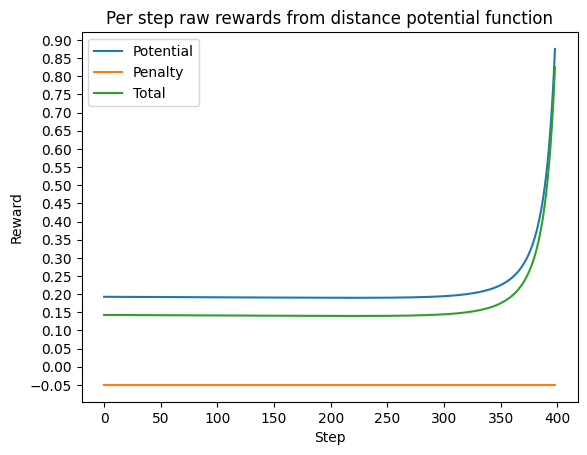

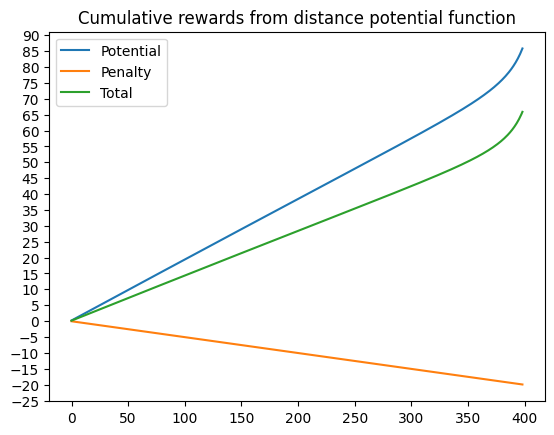

In [ ]:
gamma = 0.99
potential_coef = 20
step_penalty = -0.05
eps = 0.1
rewards_potential = np.zeros(realistic_iters - 1)
for i in range(1, realistic_iters):
    dist_prev = goal_dist - (i - 1) * realistic_improv  # previous euclidean distance
    dist_curr = goal_dist - i * realistic_improv  # current euclidean distance
    phi_prev = -dist_prev / (dist_prev + eps)  # potential function
    phi_curr = -dist_curr / (dist_curr + eps)  # potential function
    delta_phi = gamma * phi_curr - phi_prev  # positive if the distance is decreasing
    rewards_potential[i - 1] = delta_phi * potential_coef

cum_rewards_potential = np.cumsum(rewards_potential)
reward_penalty = np.full_like(rewards_potential, step_penalty)
cum_reward_penalty = np.cumsum(reward_penalty)
total_rewards = rewards_potential + reward_penalty
cum_total_rewards = np.cumsum(total_rewards)

plt.ylabel("Reward")
plt.xlabel("Step")
plt.title("Per step raw rewards from distance potential function")
plt.plot(rewards_potential, label="Potential")
plt.plot(reward_penalty, label="Penalty")
plt.plot(total_rewards, label="Total")
plt.locator_params(axis="y", nbins=30)
plt.legend()
plt.show()


plt.title("Cumulative rewards from distance potential function")
plt.plot(cum_rewards_potential, label="Potential")
plt.plot(cum_reward_penalty, label="Penalty")
plt.plot(cum_total_rewards, label="Total")
plt.locator_params(axis="y", nbins=30)
plt.legend()
plt.show()